2020/9/14 追記：test data setのフィルタリングについて, Additional resourcesについて  
2020/9/19 追記：private LBでのフィルタリング内容変更について  
2020/9/20 追記：word解説の項を追加。ヴォート生化学より引用  
私の知識不足により誤訳、誤った理解があるかもしれませんのでコメントにてご指摘頂ければ大変有り難く思います。

# word
核酸には2種類があり、デオキシリボ核酸（DNA）とリボ核酸（RNA）がある。  
また、核酸はそれぞれ4種類の塩基から構成される。  
DNAはアデニン(A)・グアニン(G)・シトシン(C)・チミン(T)から構成され、RNAはアデニン(A)・グアニン(G)・シトシン(C)・ウラシル(U)から構成される。  
DNAは二重らせん構造と呼ばれる安定的な構造を持っており、AとT、CとGがそれぞれ水素結合をする(ワトソン・クリック塩基対)ことで二本鎖の構造を持つ。  
DNAは以下の働きを持つ。  
1. 細胞分裂時に自身を複製する
2. 相補分子であるRNAの転写を指令する  
これに対して、RNAでは様々な役割と種類を持つが、今回のコンペで主題となっているRNAはメッセンジャーRNA（mRNA）である。  
ｍRNAはDNAに結合したポリメラーゼによって合成される分子である。  
真核生物と原核生物ではDNAから合成された分子の扱いが異なり、原核生物であれば合成された分子をそのままmRNAとして扱われるが真核生物であれば合成された分子はmRNA前駆体として扱われ、塩基配列の一部が切り出されることでmRNAが完成となる（スプライシング）。このとき、切り出される部分はイントロンと呼ばれ、残される部分はエキソンと呼ばれる。  
mRNAはタンパク質の合成に用いられる。  
mRNAの3塩基ごとにアミノ酸が１つ合成される。（トリプレット：https://www.toho-u.ac.jp/sci/biomol/glossary/bio/genetic_code.html）  
この合成されたアミノ酸の並びによってタンパク質の構造が決定される。  
(参考：ヴォート生化学【下】　第4版)
  
  
  
# overview
COVID-19へのワクチンとしてmRNAワクチンは大きな期待が寄せられている。  
しかしながら、mRNAは非常に安定性に欠けるため、ワクチンとしての機能を担保するためには超低温で保存する必要があり、このままでは世界中にワクチンを配布することは難しいと思われる。  
RNA分子には自然に分解される傾向があることが確認されているが、どのRNA構造が分解されやすいのかは知見が少ない。  
***このコンペではRNA分子の各塩基における分解率の予測を行う。***  
学習用のデータセットとしてEternaデータセットが与えられている。  
このデータセットには3000以上のRNA分子の配列・構造・各位置における分解率が与えられている。  
# Dataset
全長107塩基のmRNA分子3029個について、すでに主催者が分解率のラベリングを終えている。  
なお、mRNAの末端については取得が難しいため、全長107塩基の場合、最初の68塩基についての情報が与えられている。  
これら68塩基についてのみPublic LBでスコアリングが行われる。  
また、Private LBに使用されるデータは全長130塩基のmRNAが使用される。  
これら130塩基に関しては現在進行形で実験が行われている。  
全長130塩基の場合も、末端の取得はできないため、最初の91塩基についてのみスコアリングに使用される。  
（実際に使用されている塩基数に関してはseq_scored列に記載されている。）  

train data 各列の解説  
* seq_scored         ：IDのRNA分子がどの塩基までスコアリングに使用されているのか（全長107：68, 全長130：91）
* seq_length         ：IDのRNA分子の延期の長さ（107, 130の2種類）
* sequence           ：塩基配列（A/U/G/Cの並び方）
* structure          ：()と.で表している。()はペアになっている(結合している)塩基同士を表す
* reactivity         ：各塩基における反応性について。RNAの二次構造を決定している。
* deg_pH10           ：pH10における各塩基の反応性をみる(予測提出が求められるがスコアリングには使用されない)
* deg_Mg_pH10        ：pH10かつマグネシウムの入った溶媒における各塩基の反応性をみる
* deg_50C            ：50℃における各塩基の反応性をみる(予測提出が求められるがスコアリングには使用されない)
* deg_ng_50C         ：50℃かつマグネシウムの入った溶媒における各塩基の反応性をみる
* _error_            ：reactivity, deg_列について実験上のエラー率
* predicted_loop_type：各アルファベットはそれぞれ構造を表すS: paired "Stem" M: Multiloop I: Internal loop B: Bulge H: Hairpin loop E: dangling End X: eXternal loop  
  
  
public data setに使用されるtest.jsonファイルのデータ（RNA分子629個）は信頼性の高いデータを使用している。  
信頼性の担保は以下フィルタリングを用いている。
* target colsとして使用されている5列がいずれも‐0.5以上
* target colsとして使用されている5列のsignal to noise平均が1を上回る（signal_to_noise列）
* train.jsonとtest.jsonの合計3029分子は塩基配列の相似度でクラスタリングを行われており、test.jsonのRNA分子はクラスターの分子が3種類以下のクラスターを用いている  
***なお、上記フィルタリングはprivate LBのデータには用いられない。***  
***9/19追記：内容が変更され、上記フィルタリングがprivate LBにも適用されるようになった。3005RNA分子中、上記フィルタリングを通過した信頼性の高いデータのみをスコアリングに用いる。なお、コンペ期間中にはどれがフィルタリングを通過しているかは不明***  

【参考】  
https://www.kaggle.com/c/stanford-covid-vaccine/discussion/182583  
https://www.kaggle.com/c/stanford-covid-vaccine/discussion/182654  
  
  
## bppsファイルについて
各塩基がRNA分子内で結合し構造を構成する確率を表している。   
【参考】  
RNA分子構造のビジュアライズについて
https://www.kaggle.com/c/stanford-covid-vaccine/discussion/182177  
  

  
# Evaluation
MCRMSEを使用して評価が行われる。 
MSE（平均二乗誤差）  
評価に使用される列はreactivity, deg_Mg_pH10, deg_pH10, deg_Mg_50C, deg_50Cの5列  
  
  
# Additional resources
mRNA：メッセンジャーRNA。通常DNAの塩基対として構成され、リボソームにてタンパク質を合成する役割を持つ。  
RNAワクチン：ｍRNAがコードするタンパク質を抗原タンパク質の構造の一部とすることで免疫機構に抗原タンパク質の構造を記憶させる。  
これによって実際に抗原が侵入した際に即時応答が可能。  

しかしながらmRNAはDNAと異なり一本鎖で構成される（DNAは二本鎖）ため、安定性が劣り、すぐに分解されてしまう。  
この弱点を克服するため、シンプルな解決法として、RNA分子内で結合構造を樹状に持つように設計することが考えられた。  
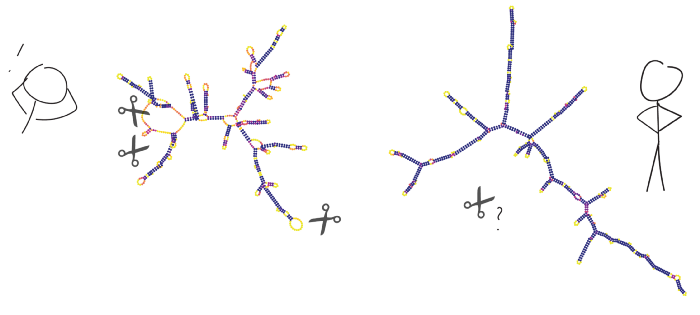  
(https://medium.com/eternaproject/how-to-build-a-better-vaccine-from-the-comfort-of-your-own-web-browser-233343e0210d)  
一本鎖の部位が減少することで大幅に半減期が改善された。

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import json
import ast
import seaborn as sns
import os

from itertools import cycle
pd.set_option('max_columns', None)

!ls -GFlash --color ../input/stanford-covid-vaccine/
!ls -GFlash --color ../input/stanford-covid-vaccine/bpps/ | head
!du -h ../input/stanford-covid-vaccine/bpps/

In [ ]:
train = pd.read_json('../input/stanford-covid-vaccine/train.json',lines=True)
test = pd.read_json('../input/stanford-covid-vaccine/test.json', lines=True)
ss = pd.read_csv('../input/stanford-covid-vaccine/sample_submission.csv')
train.shape, test.shape, ss.shape

# train & test & sample_sub

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
ss.head()

# Read Numpy File

In [ ]:
bpps_files = os.listdir('../input/stanford-covid-vaccine/bpps/')
example_bpps = np.load(f'../input/stanford-covid-vaccine/bpps/{bpps_files[0]}')
print('bpps file shape:', example_bpps.shape)

In [ ]:
for i in range(100):
    example_bpps = np.load(f'../input/stanford-covid-vaccine/bpps/{bpps_files[i]}')
    print('bpps file shape:', example_bpps.shape)

In [ ]:
# 1行目の7列目の要素と7行目の1列目の要素が一致していることを確認
example_bpps[0], example_bpps[6]

In [ ]:
plt.style.use('default')
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
axs = axs.flatten()
for i, f in enumerate(bpps_files):
    if i == 25:
        break
    example_bpps = np.load(f'../input/stanford-covid-vaccine/bpps/{f}')
    axs[i].imshow(example_bpps)
    axs[i].set_title(f)
plt.tight_layout()
plt.show()

# submit

In [ ]:
ss.to_csv('submission.csv', index=False)